In [15]:
import numpy as np

In [16]:
f=open("/Users/zhangxiaochen/nbs/study/ocr/freqcn").read()

In [17]:
chars = list(set(list(f)))

In [30]:
letters=list(chr(i) for i in range(97,97+26))
letters2=list(chr(i).upper() for i in range(97,97+26))
numbers=list(str(i) for i in range(10))
chars = list(set(chars)-set(letters)-set(letters2)-set(numbers))
chars =numbers+letters+letters2+chars
chars = list(chars)

In [31]:
len(chars)

3566

In [32]:
rg_n = (0,len(numbers))
rg_l = (rg_n[1],rg_n[1] + len(letters))
rg_u = (rg_l[1],rg_l[1] + len(letters2))
rg_c = (rg_u[1],rg_u[1] + len(chars)-len(numbers)-len(letters)-len(letters2))

In [33]:
np.save("chars.npy",chars)

In [34]:
len(chars)

3566

In [35]:
chars=np.load("chars.npy").tolist()

In [36]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as patches

In [62]:
from glob import glob
import os

fonts=glob("/data/fonts_cn/*")

fonts[:3]

['/data/fonts_cn/msyh.ttf',
 '/data/fonts_cn/SentyChalk.ttf',
 '/data/fonts_cn/SentyCHALKoriginal.ttf']

In [3]:
def rd(scale,start=0):
    return int(np.random.rand()*scale)+start

def rd_font(size):
    return ImageFont.FreeTypeFont(fonts[rd(len(fonts))],size)

def tp2color(rdnb):
    return "#%.2x%.2x%.2x%.2x"%(rdnb[0],rdnb[1],rdnb[2],rdnb[3])

In [4]:
tp2color((rd(255),rd(255),rd(255),rd(200,50)))

'#d397bf5e'

In [5]:
%matplotlib inline

NameError: name 'chars' is not defined

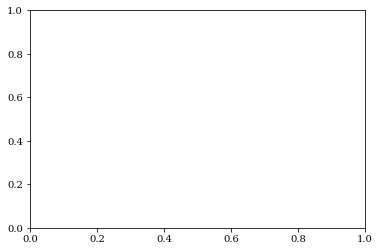

In [6]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 


nb_c  = 20
fig,ax = plt.subplots(1)
img = Image.open("/data/coco/val2017/000000000776.jpg").resize((320,320))
draw = ImageDraw.Draw(img)
# font = ImageFont.truetype(<font-file>, <font-size>)
# draw.text((x, y),"Sample Text",(r,g,b))

# Chinese
for i in range(int(nb_c*.4)):
    f_size=rd(30,30)
    x,y=rd(320-f_size), rd(320-f_size)
    f_color = (rd(255),rd(255),rd(255),rd(200,50))
    ft = rd_font(f_size)
    txt = chars[rd(3500)]
    f_size = ft.getsize(text=txt)
    draw.text((x,y),txt,f_color,font=ft)
    rect = patches.Rectangle((x, y), f_size[0], f_size[1],linewidth=1,edgecolor = tp2color(f_color),facecolor='none')
    ax.add_patch(rect)
    
# lower case
for i in range(int(nb_c*.1)):
    f_size=rd(30,20)
    x,y = rd(320-f_size), rd(320-f_size)
    f_color = (rd(255),rd(255),rd(255),rd(200,50))
    
    ft = rd_font(f_size)
    txt = letters[rd(26)]
    f_size = ft.getsize(text=txt)
    draw.text((x,y),txt,f_color,font=ft)
    rect = patches.Rectangle((x, y), f_size[0], f_size[1],linewidth=1,edgecolor = tp2color(f_color),facecolor='none')
    ax.add_patch(rect)
    
# upper case
for i in range(int(nb_c*.1)):
    f_size=rd(30,20)
    x,y = rd(320-f_size), rd(320-f_size)
    f_color = (rd(255),rd(255),rd(255),rd(200,50))
    
    ft = rd_font(f_size)
    txt = letters2[rd(26)]
    f_size = ft.getsize(text=txt)
    draw.text((x,y),txt,f_color,font=ft)
    rect = patches.Rectangle((x, y), f_size[0], f_size[1],linewidth=1,edgecolor = tp2color(f_color),facecolor='none')
    ax.add_patch(rect)
    
# numbers
for i in range(int(nb_c*.4)):
    f_size=rd(30,20)
    x,y = rd(320-f_size), rd(320-f_size)
    f_color = (rd(100,155),rd(100,155),rd(100,155),rd(200,50))
    
    ft = rd_font(f_size)
    txt = numbers[rd(10)]
    f_size = ft.getsize(text=txt)
    draw.text((x,y),txt,f_color,font=ft)
    rect = patches.Rectangle((x, y), f_size[0], f_size[1],linewidth=1,edgecolor = tp2color(f_color),facecolor='none')
    ax.add_patch(rect)
        
ax.imshow(img)
img.save('/Users/zhangxiaochen/Pictures/001_txt.jpg')


In [1]:
from torch.utils.data import dataset
from constant import *
import numpy as np
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
from constant_char import *

fonts = glob("/data/fonts_cn/*")


def rd(scale, start=0):
    return int(np.random.rand() * scale) + start

def rd_font(size):
    return ImageFont.FreeTypeFont(fonts[rd(len(fonts))], size)

class Make_Char_cn(dataset.Dataset):
    def __init__(self, **kwargs):
        """
        The data generator to generate iamge loaded with texts
        kwargs:
            img_dir
            forge_dir
        """
        super(Make_Char_cn, self).__init__()
        for k, v in kwargs.items():
            setattr(self, k, v)
        if self.img_dir[-1] != "/":
            self.img_dir += "/"
        if self.forge_dir[-1] != "/":
            self.forge_dir += "/"
        self.grid_size = int(SIZE/SCALE)
        self.img_list = glob(self.img_dir + "*")
        self.pairs = np.concatenate([np.tile(range(self.grid_size),[self.grid_size,1])[:,:,np.newaxis],
                                     np.tile(range(self.grid_size),[self.grid_size,1]).T[:,:,np.newaxis]],
                                    axis=-1).reshape(-1,2)*SCALE
        self.df_dicts = [dict()] * len(self.img_list)

    def __len__(self):
        return len(self.img_list)
    
    def __getitem__(self, idx):
        fn_id = self.img_list[idx].split("/")[-1]
        fn = self.id2url(fn_id)
        img = Image.open(fn).convert("RGB").resize((WIDTH, HEIGHT))
        draw = ImageDraw.Draw(img)
        nb_ttl = rd(10, 15)
        bbox = list()
        category_id = list()
        rg=rg_c
        bbox_, cateid_ = self.write_char_cls(draw, rg)
        bbox += bbox_
        category_id += cateid_
        filename = [fn_id] * len(category_id)
        self.df_dicts[idx] = pd.DataFrame(
            {"bbox": bbox, "file_name": filename, "image_id": filename, "category_id": category_id})
        img.save(self.forge_dir + fn_id)
        return 0

    def id2url(self, filename):
        return self.img_dir + filename

    def write_char(self, draw, nb_c, rg):
        bbox = list()
        category_id = list()
        for i in range(nb_c):
            scale = rd(30,15)
            x, y = rd(WIDTH - scale), rd(HEIGHT - scale)
            f_color = (rd(255), rd(255), rd(255), rd(200, 50))
            ft = rd_font(scale)  # font
            cate_id = np.random.choice(range(rg[0], rg[1]))
            txt = chars[cate_id]
            f_size = ft.getsize(text=txt)

            draw.text((x, y), txt, f_color, font=ft)

            bbox.append([x, y, f_size[0], f_size[1]])
            category_id.append(cate_id)
            
        return bbox, category_id
            
    def write_char_cls(self,draw,rg):
        bbox = list()
        category_id = list()
        for x,y in self.pairs[np.random.choice(range(100),50,replace = False)]:
            
            scale = rd(30,15)
            f_color = (rd(255), rd(255), rd(255), rd(200, 50))
            ft = rd_font(scale)  # font
            cate_id = np.random.choice(range(rg[0], rg[1]))
            txt = chars[cate_id]
            f_size = ft.getsize(text=txt)

            draw.text((x, y), txt, f_color, font=ft)

            bbox.append([x, y, f_size[0], f_size[1]])
            category_id.append(cate_id)

        return bbox, category_id


In [2]:
from torch.utils.data import DataLoader

In [3]:
%rm /data/forge/char_detect_cn/*
mc = Make_Char_cn(img_dir = "/data/coco/val2017/",forge_dir="/data/forge/char_detect_cn/")
dl = DataLoader(mc,batch_size=4,shuffle=True)
mc_gen=iter(dl)

from tqdm import trange
t=trange(3)
# t=trange(len(dl))

for i in t:_ = next(mc_gen)

mc.df_dicts = list(d for d in mc.df_dicts if type(d)!= dict)

pd.concat(mc.df_dicts,axis=0).to_csv("/data/forge/char_lbl_cn.csv")

100%|██████████| 3/3 [00:02<00:00,  1.13it/s]


In [4]:
lbl = pd.read_csv("/data/forge/char_lbl_cn.csv")

In [5]:
lbl.columns

Index(['Unnamed: 0', 'bbox', 'category_id', 'file_name', 'image_id'], dtype='object')

In [7]:
lbl["cate_cn"]=lbl["category_id"].apply(lambda x:IDX2CHARS_CN[x])

In [8]:
lbl

,Unnamed: 0,bbox,category_id,file_name,image_id,cate_cn
0,0,"[192, 160, 41, 60]",1328,000000030494.jpg,000000030494.jpg,蓬
1,1,"[32, 64, 21, 21]",3375,000000030494.jpg,000000030494.jpg,乓
2,2,"[224, 192, 15, 17]",3394,000000030494.jpg,000000030494.jpg,世
3,3,"[256, 0, 46, 65]",2267,000000030494.jpg,000000030494.jpg,簇
4,4,"[192, 32, 34, 37]",379,000000030494.jpg,000000030494.jpg,脸
5,5,"[64, 64, 36, 38]",2221,000000030494.jpg,000000030494.jpg,联
6,6,"[224, 96, 35, 49]",3492,000000030494.jpg,000000030494.jpg,辱
7,7,"[256, 160, 20, 25]",2936,000000030494.jpg,000000030494.jpg,表
8,8,"[0, 256, 18, 32]",1691,000000030494.jpg,000000030494.jpg,吏
9,9,"[160, 160, 42, 47]",1090,000000030494.jpg,000000030494.jpg,获


In [25]:
np.concatenate([np.tile(range(10),[10,1])[:,:,np.newaxis],
                                     np.tile(range(10),[10,1]).T[:,:,np.newaxis]],
                                    axis=-1).reshape(-1,2)*SCALE

array([[  0,   0],
       [ 32,   0],
       [ 64,   0],
       [ 96,   0],
       [128,   0],
       [160,   0],
       [192,   0],
       [224,   0],
       [256,   0],
       [288,   0],
       [  0,  32],
       [ 32,  32],
       [ 64,  32],
       [ 96,  32],
       [128,  32],
       [160,  32],
       [192,  32],
       [224,  32],
       [256,  32],
       [288,  32],
       [  0,  64],
       [ 32,  64],
       [ 64,  64],
       [ 96,  64],
       [128,  64],
       [160,  64],
       [192,  64],
       [224,  64],
       [256,  64],
       [288,  64],
       [  0,  96],
       [ 32,  96],
       [ 64,  96],
       [ 96,  96],
       [128,  96],
       [160,  96],
       [192,  96],
       [224,  96],
       [256,  96],
       [288,  96],
       [  0, 128],
       [ 32, 128],
       [ 64, 128],
       [ 96, 128],
       [128, 128],
       [160, 128],
       [192, 128],
       [224, 128],
       [256, 128],
       [288, 128],
       [  0, 160],
       [ 32, 160],
       [ 64,

In [46]:
np.tile(range(10),[10,1])

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [28]:
np.random.choice(range(100),90,replace=False)

array([20, 83,  6, 75, 50, 34, 95,  0, 45, 41, 39, 53, 27, 14, 63, 30, 35,
        1, 67, 84, 76,  8, 59, 57,  9, 54, 82, 31, 58, 87, 86, 22,  3, 91,
       71, 98, 10, 48, 81,  5, 29, 12, 88, 43, 96, 93, 72, 36, 40, 78, 97,
       64, 68, 25, 55, 62, 19, 24, 92, 15, 56, 42,  4, 18, 44, 90, 65, 38,
       70, 79,  2, 51, 21, 99, 33, 52,  7, 32, 17, 94, 61, 89, 28, 26, 74,
       47, 11, 16, 77, 80])

In [32]:
char_lbl = pd.read_csv("/data/forge/char_lbl.csv")

In [33]:
char_lbl

,Unnamed: 0,bbox,category_id,file_name,image_id
0,0,"[151, 135, 21, 53]",9,000000000139.jpg,000000000139.jpg
1,1,"[69, 246, 31, 41]",5,000000000139.jpg,000000000139.jpg
2,2,"[18, 242, 17, 41]",7,000000000139.jpg,000000000139.jpg
3,3,"[18, 67, 16, 29]",2,000000000139.jpg,000000000139.jpg
4,4,"[95, 31, 7, 25]",1,000000000139.jpg,000000000139.jpg
5,5,"[40, 101, 17, 32]",2,000000000139.jpg,000000000139.jpg
6,6,"[274, 57, 12, 38]",26,000000000139.jpg,000000000139.jpg
7,7,"[93, 253, 7, 18]",27,000000000139.jpg,000000000139.jpg
8,8,"[235, 81, 8, 27]",33,000000000139.jpg,000000000139.jpg
9,9,"[230, 19, 20, 55]",47,000000000139.jpg,000000000139.jpg
